In [1]:
import pandas as pd

In [2]:
import os
os.listdir("./data")

['WCO-sample-data.trig.gz',
 'TCLU8710985.xlsx',
 'TGBU5032623.xlsx',
 '.DS_Store',
 'code-list_csv.csv',
 'Dataset-data-interoperability_rev-HA.xlsx',
 'BDCU7000740.xlsx',
 'TCLU5865598.xlsx',
 'ports-per-container.xlsx',
 'MRKU0622923.xlsx',
 'TCKU7127050.xlsx',
 'FDCU0161962.xlsx',
 'TEMU7566823.xlsx',
 'SEGU4724148.xlsx']

In [3]:
df_delivered = pd.read_excel("data/Dataset-data-interoperability_rev-HA.xlsx", sheet_name=None, engine="openpyxl")

In [85]:
df_cust = df_delivered['Customs data']

In [86]:
df_cust['route_list'] = df_cust.ROUTE.str.split('|', expand=False)
df_cust = df_cust.dropna(subset=['route_list'])

In [87]:
pd.read_excel("data/Dataset-data-interoperability_rev-HA.xlsx", sheet_name=None, engine="openpyxl")

{'Logistics data':   Containernummer    Rederij   Status 17 okt  \
 0     TEMU7566823      Hapag  Vessel Sailing   
 1     TGBU5032623      Cosco  Vessel Arrived   
 2     TCLU8710985       OOCL  Vessel Sailing   
 3     TCLU5865598        One  Vessel Sailing   
 4     MRKU0622923     Maersk  Vessel Arrived   
 5     FDCU0161962        CMA  Vessel Arrived   
 6     SEGU4724148        MSC  Vessel Arrived   
 7     DRYU2297082  Evergreen  Vessel Sailing   
 8     TCKU7127050     Maersk  Vessel Arrived   
 9     BDCU7000740        CMA  Vessel Arrived   
 
                                         Bron Rederij                  Schip  \
 0  https://www.hapag-lloyd.com/en/online-business...              Mol Truth   
 1  https://elines.coscoshipping.com/ebusiness/car...   Cosco Shipping Aries   
 2  https://www.oocl.com/eng/ourservices/eservices...  Cosco Shipping Taurus   
 3  https://ecomm.one-line.com/one-ecom/manage-shi...            YM Wellness   
 4        https://www.maersk.com/tracking

In [88]:
dftmp = pd.read_csv("data/code-list_csv.csv")

In [89]:
dftmp.columns

Index(['Change', 'Country', 'Location', 'Name', 'NameWoDiacritics',
       'Subdivision', 'Status', 'Function', 'Date', 'IATA', 'Coordinates',
       'Remarks'],
      dtype='object')

In [90]:
dftmp['unloccode'] = dftmp["Country"] + dftmp["Location"]

In [146]:
dftmp

,Change,Country,Location,Name,NameWoDiacritics,Subdivision,Status,Function,Date,IATA,Coordinates,Remarks,unloccode
0,NaN,AD,ALV,Andorra la Vella,Andorra la Vella,NaN,AI,--34-6--,601.0,NaN,4230N 00131E,NaN,ADALV
1,NaN,AD,CAN,Canillo,Canillo,NaN,RL,--3-----,307.0,NaN,4234N 00135E,NaN,ADCAN
2,NaN,AD,ENC,Encamp,Encamp,NaN,RL,--3-----,307.0,NaN,4232N 00134E,NaN,ADENC
3,NaN,AD,ESC,Escaldes-Engordany,Escaldes-Engordany,NaN,RL,--3-----,307.0,NaN,4231N 00133E,NaN,ADESC
4,NaN,AD,EAC,Escàs,Escas,04,RL,--3-----,1407.0,NaN,4233N 00131E,NaN,ADEAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111548,NaN,ZW,STH,Southerton,Southerton,NaN,RL,--3-----,201.0,NaN,1751S 03101E,NaN,ZWSTH
111549,NaN,ZW,THJ,Thompson Junction,Thompson Junction,NaN,RL,-23-----,701.0,NaN,1800S 02626E,NaN,ZWTHJ
111550,NaN,ZW,VFA,Victoria Falls,Victoria Falls,NaN,AI,---4----,9501.0,NaN,NaN,NaN,ZWVFA
111551,NaN,ZW,ZMZ,Zimbabwe,Zimbabwe,MV,RL,1-3-----,1401.0,NaN,2016S 03055E,NaN,ZWZMZ


In [91]:
import coordinates as coords

In [140]:
lookup_coords = coords.get_ports_coordinates()

In [145]:
lookup_coords

,UNLocode,Name,geometry
0,ADALV,Andorra la vella,POINT (1.31000 42.30000)
1,ADCAN,Canillo,POINT (1.35000 42.34000)
2,ADENC,Encamp,POINT (1.34000 42.32000)
3,ADESC,Escaldes-engordany,POINT (1.33000 42.31000)
4,ADEAC,Escàs,POINT (1.31000 42.33000)
...,...,...,...
111547,ZWSGW,Shurugwi,POINT (30.00000 -19.40000)
111548,ZWSTH,Southerton,POINT (31.01000 -17.51000)
111549,ZWTHJ,Thompson junction,POINT (26.26000 -18.00000)
111551,ZWZMZ,Zimbabwe,POINT (30.55000 -20.16000)


In [229]:
lookup_coords.query("UNLocode == 'ADALV'").geometry.get_value(x,0)

AttributeError: 'GeoSeries' object has no attribute 'get_value'

In [144]:
lookup_coords.query("UNLocode == SGSIN")

UndefinedVariableError: name 'SGSIN' is not defined

In [147]:
dftmp[dftmp.unloccode == "SGSIN"]

,Change,Country,Location,Name,NameWoDiacritics,Subdivision,Status,Function,Date,IATA,Coordinates,Remarks,unloccode
86122,NaN,SG,SIN,Singapore,Singapore,NaN,AI,1--45---,9601.0,NaN,NaN,NaN,SGSIN


In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [16]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
# countries.head()

In [39]:
import datetime

In [95]:
df3 = pd.DataFrame(data={'latitude': [51.9631056, 40.6971494], 
                   'longitude': [4.0837907, -74.2598701], 
                   'brightness': [400, 400],
                   'acq_date': ['2019-09-30', '2019-09-30']})

df['acq_date'] = pd.to_datetime(df['acq_date'])

df3


,latitude,longitude,brightness,acq_date
0,51.963106,4.083791,400,2019-09-30
1,40.697149,-74.259870,400,2019-09-30


In [116]:
lookup_coords

,UNLocode,Name,geometry
0,ADALV,Andorra la vella,POINT (1.31000 42.30000)
1,ADCAN,Canillo,POINT (1.35000 42.34000)
2,ADENC,Encamp,POINT (1.34000 42.32000)
3,ADESC,Escaldes-engordany,POINT (1.33000 42.31000)
4,ADEAC,Escàs,POINT (1.31000 42.33000)
...,...,...,...
111547,ZWSGW,Shurugwi,POINT (30.00000 -19.40000)
111548,ZWSTH,Southerton,POINT (31.01000 -17.51000)
111549,ZWTHJ,Thompson junction,POINT (26.26000 -18.00000)
111551,ZWZMZ,Zimbabwe,POINT (30.55000 -20.16000)


16864    113.06
dtype: float64

In [137]:
sum(lookup_coords.UNLocode=="SGSIN")

0

In [256]:
lookup_coords.query("UNLocode == @port_from").geometry.x.iloc[0]

119.52

In [298]:
row = df_cust[df_cust.CONTAINERNUMMER == 'TCLU8710985']
row.route_list[2]

['EGSCN',
 'VNCMT',
 'VNTOT',
 'VNVUT',
 'HKHKG',
 'CNNSA',
 'CNXMG',
 'CNXAM',
 'SGSIN']

portfrom: CNYTN
portto: CNYTN


###
coords from:  32.2 42.18
portfrom: CNYTN
portto: CNYTN


###
coords from:  107.0 10.31
portfrom: CNYTN
portto: CNYTN


###
coords from:  107.05 10.23
portfrom: CNYTN
portto: CNYTN
portfrom: CNYTN
portto: CNYTN
portfrom: CNYTN
portto: CNYTN


###
coords from:  113.35 22.45
portfrom: CNYTN
portto: CNYTN


###
coords from:  118.12 24.21
portfrom: CNYTN
portto: CNYTN


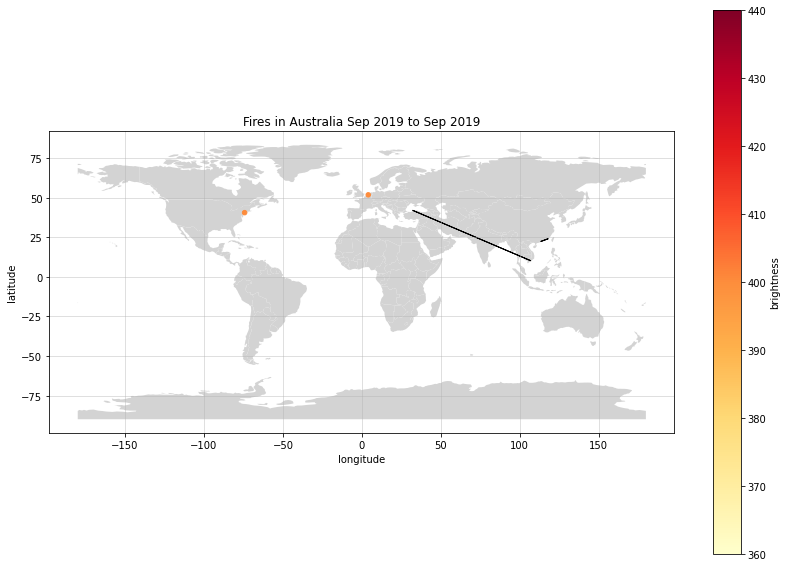

In [300]:
# initialize an axis
fig, ax = plt.subplots(figsize=(14,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)



# for i, row in df3.iterrows():
#     if i == 0:
#         continue
#     from_country = df3.loc[i-1]
#     to_country = df3.loc[i]
#     ax.arrow(from_country['longitude'], from_country['latitude'], to_country['longitude'] - from_country['longitude'], to_country['latitude'] - from_country['latitude'], head_width=0.05, head_length=0.1, fc='k', ec='k')

    
    
    
for i, row in df_cust.iterrows():
    if i < 2:
        continue
    
    route_len = len(row.route_list)
    for i in range(route_len-1):
        
        port_origin = row.route_list[i]
        port_dest = row.route_list[i+1][:5]
        print("portfrom:", port_from)
        print("portto:", port_to)
        
        
        port_origin_xy = lookup_coords.query("UNLocode == @port_origin").geometry
        port_dest_xy = lookup_coords.query("UNLocode == @port_dest").geometry

        if len(port_origin_xy) == 0 or len(port_dest_xy) == 0:
            continue

        x, y = port_origin_xy.x.iloc[0], port_origin_xy.y.iloc[0]
        dx, dy = port_dest_xy.x.iloc[0] - x, port_dest_xy.y.iloc[0] - y
        print("\n\n###")
        print("coords from: ", x, y)
#         print(coord_to.x, coord_to.y)
#         print(list((x, y)))
        
        ax.arrow(x, y, dx, dy, fc='k', ec='k')

    
    break
    
    
# parse dates for plot's title
first_month = df["acq_date"].min().strftime("%b %Y")
last_month = df["acq_date"].max().strftime("%b %Y")
# plot points
df3.plot(x="longitude", y="latitude", kind="scatter", 
         c="brightness",
         colormap="YlOrRd", 
        title=f"Fires in Australia {first_month} to {last_month}", 
        ax=ax)

# add grid
ax.grid(visible=True, alpha=0.5)
plt.show()